# Noise2Void - 2D Example for SEM data

In [1]:
# We import all our dependencies.
from n2v.models import N2V
import numpy as np
from matplotlib import pyplot as plt
from tifffile import imread
from csbdeep.io import save_tiff_imagej_compatible

Using TensorFlow backend.


## Load the Network

In [2]:
# A previously trained model is loaded by creating a new N2V-object without providing a 'config'.  
model_name = 'n2v_2D'
basedir = 'models'
model = N2V(config=None, name=model_name, basedir=basedir)

Loading network weights from 'weights_best.h5'.


In [3]:
# In case you do not want to load the weights that lead to lowest validation loss during 
# training but the latest computed weights, you can execute the following line:

# model.load_weights('weights_last.h5')

## Prediction
Here we will simply use the same data as during training and denoise it using our network.

In [4]:
# We load the data we want to process.
input_train = imread('data/train.tif')

# Here we process the data.
# The parameter 'n_tiles' can be used if images are to big for the GPU memory.
# If we do not provide the n_tiles' parameter the system will automatically try to find an appropriate tiling.
# This can take longer.
pred_train = model.predict(input_train, axes='YX', n_tiles=(2,1))

# We load and process the data we previously used for validation.
input_val = imread('data/validation.tif')
pred_val = model.predict(input_val, axes='YX')

100%|██████████| 2/2 [00:01<00:00,  1.19it/s]   


### Show results on training data...

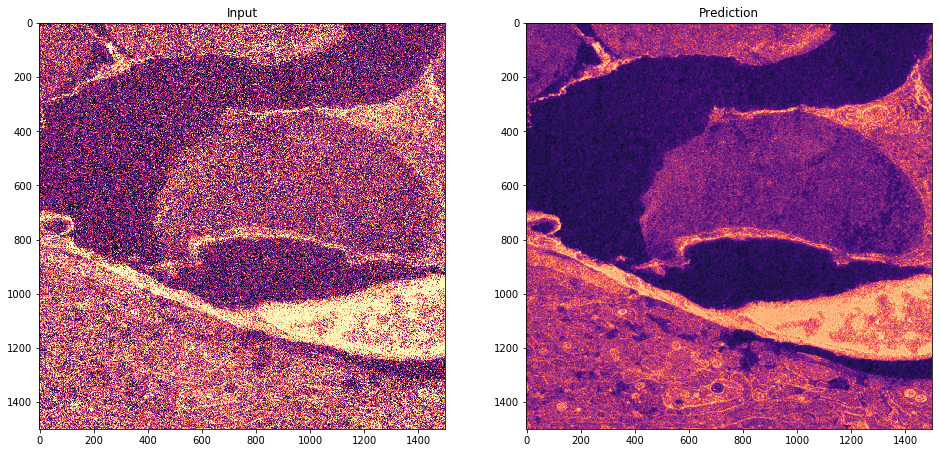

In [5]:
# Let's look at the results.
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.imshow(input_train[:1500:,:1500],cmap="magma")
plt.title('Input');
plt.subplot(1,2,2)
plt.imshow(pred_train[:1500,:1500],cmap="magma")
plt.title('Prediction');

### Show results on validation data...

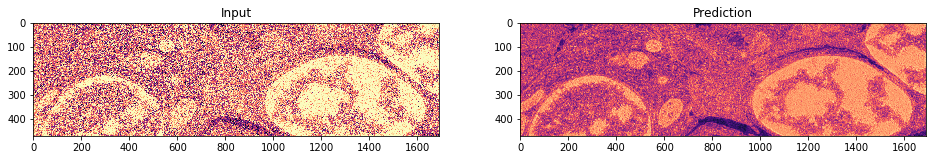

In [6]:
# Let's look at the results.
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.imshow(input_val,cmap="magma")
plt.title('Input');
plt.subplot(1,2,2)
plt.imshow(pred_val,cmap="magma")
plt.title('Prediction');

## Save Results

In [7]:
save_tiff_imagej_compatible('pred_train.tif', pred_train, axes='YX')
save_tiff_imagej_compatible('pred_validation.tif', pred_val, axes='YX')